In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [6]:
gpu_utilization_api_calling = 'gpu_utilization_api_calling.csv'
gpu_utilization_SD = 'gpu_utilization_SD.csv'
gpu_utilization_MCSD = 'gpu_utilization_MCSD.csv'

In [7]:
gpu_utilization = []
with open(gpu_utilization_api_calling, 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        temp = row[0].strip('[]').split(',')
        gpu_utilization.extend(list(map(float, temp)))

In [8]:
l = len(gpu_utilization)
print(f"Total time in minute: {l/600}")

Total time in minute: 145.96


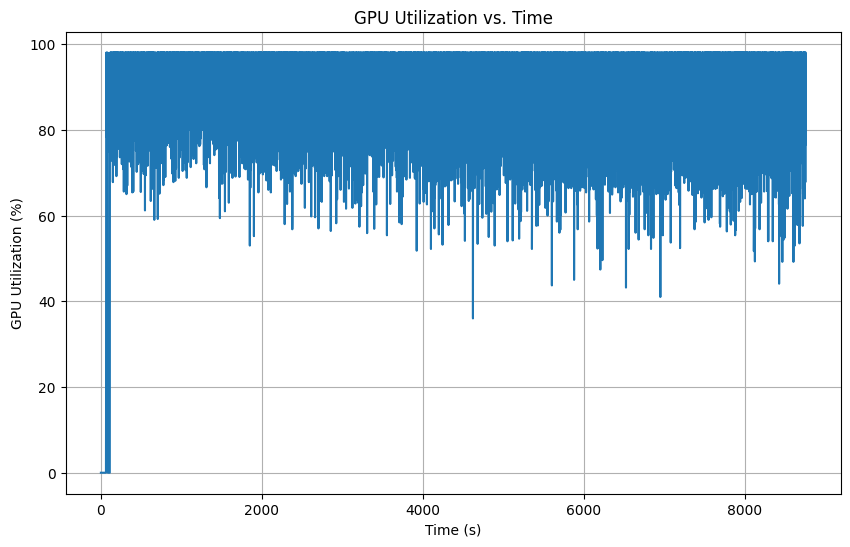

Integral of GPU utilization and time: 763307.0


In [18]:
# Calculate the number of complete 1-second intervals
num_intervals = len(gpu_utilization) // 10

# Create time array (data is collected every 100ms)
time = np.arange(0, num_intervals)

gpu_utilization = np.array(gpu_utilization)
gpu_utilization_reshaped = gpu_utilization[:num_intervals * 10].reshape(-1, 10).mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(time, gpu_utilization_reshaped)
plt.xlabel('Time (s)')
plt.ylabel('GPU Utilization (%)')
plt.title('GPU Utilization vs. Time')
plt.grid(True)
plt.show()

# Calculate the integral of utilization and time
integral = np.trapz(gpu_utilization_reshaped, time)
print(f"Integral of GPU utilization and time: {integral}")